# Support Vector Machine with Gradient Descent
In this notebook, we will be building a Support Vector Machine to solve a 2-class classification problem by finding the optimal hyperplane that maximises the margin between the two data classes, through gradient descent.

Support vectors are data points nearest to the hyperplane such that if they are removed, the position of the hyperplane will be affected.
![img](https://camo.githubusercontent.com/ae3d247a4c7cf5bc9f4134a1a90c0df69b39e988/68747470733a2f2f7777772e64747265672e636f6d2f75706c6f616465642f70616765696d672f53766d4d617267696e322e6a7067)

## Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data Preparation

In [2]:
# Input Data
X = np.array([[-2,4,-1],[4,1,-1],[1,6,-1],[2,4,-1],[6,2,-1]])
y = np.array([-1,-1,1,1,1])

## Data Visualisation

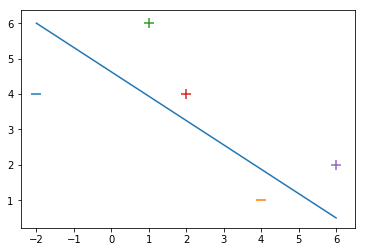

In [3]:
def plot_data(X):   
    for d, sample in enumerate(X):
        if d < 2:
            # Plot negative samples (first 2)
            plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
        else:
            # Plot positive samples (last 3)
            plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

plot_data(X)
# Plot a random hyperplane
plt.plot([-2,6], [6,0.5])

## Loss and Objective Function  


#### Hinge loss is used for maximum margin classification:  
<br>
$$
c(x, y, f(x))= 
\begin{cases}
    0,& \text{if } y*f(x)\geq 1\\
    1-y*f(x),              & \text{else}
\end{cases}
$$
<br>
y refers to true label, f(x) refers to the predicted label.

#### Objective Function

$$\underset{w}{min}\ \lambda\parallel w\parallel^2 + \ \sum_{i=1}^n\big(1-y_i \langle x_i,w \rangle\big)_+$$
<br>
On the left side, is the regularization term, and on the right, is the loss function.  
Lambda here is equal to 1/ epochs

The objective function states out in mathematical terms the goal of this machine learning problem, which is to find the optimum W that defines the equation of the hyperplane.

#### Derivative of Objective Function w.r.t W
To apply gradient descent to find the optimum value of W (the minima), we need the partial derivatives of the loss and regularization term with respect to W.

$$
\frac{\delta}{\delta w_k} \lambda\parallel w\parallel^2 \ = 2 \lambda w_k
$$

$$
\frac{\delta}{\delta w_k} \big(1-y_i \langle x_i,w \rangle\big)_+ \ = \begin{cases}
    0,& \text{if } y_i \langle x_i,w \rangle\geq 1\\
    -y_ix_{ik},              & \text{else}
\end{cases}
$$

#### Gradient Descent
In each step of training, we then update W by subtracting from the current W, the product of learning rate and the partial derivatives:

if $y_i⟨x_i,w⟩ < 1$:
$$
w = w + \eta (y_ix_i - 2\lambda w)
$$
else:
$$
w = w + \eta (-2\lambda w)
$$


In [4]:
def plot_errors(errors):
    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassfied')
    plt.show()

In [5]:
def svm_with_sgd(X, Y, lr, epochs):
    w = np.zeros(len(X[0]))
    errors = []
    
    for epoch in range(1, epochs):
        error = 0
        for i, x in enumerate(X):
            # Gradient Descent
            if(Y[i] * np.dot(X[i], w) < 1):
                w = w + lr * (X[i] * Y[i] + (-2 * (1/epoch) * w))
                error = 1
            else:
                w = w + lr * (-2 * (1/epoch) * w)
        errors.append(error)
    
    plot_errors(errors)
    return w

In [6]:
w = svm_sgd_plot(X, Y)

NameError: name 'svm_sgd_plot' is not defined

NameError: name 'w' is not defined

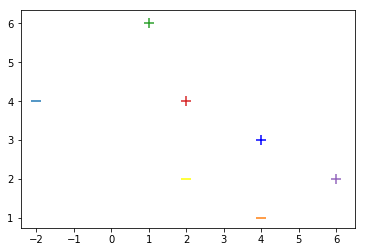

In [8]:
plot_data(X)

# Adding test samples
plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print hyper plane calculated
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
nX, nY, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(nX,nY,U,V,scale=1, color='blue')